# Experiment 2: Model Evaluating

In [1]:
import numpy as np
from keras.models import load_model
from matplotlib import ticker
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In this experiment, we load model weights from the experiment1 and evaluate them on test dataset.

In [2]:
data = loadmat('./dataset/mango/mango_dm_split.mat')
x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=12, shuffle=True)
x_train, x_val, x_test = x_train[:, np.newaxis, :], x_val[:, np.newaxis, :], x_test[:, np.newaxis, :]
print(f"shape of data:\n"
      f"x_train: {x_train.shape}, y_train: {y_train.shape},\n"
      f"x_val: {x_val.shape}, y_val: {y_val.shape}\n"
      f"x_test: {x_test.shape}, y_test: {y_test.shape}")

shape of data:
x_train: (5728, 1, 102), y_train: (5728, 1),
x_val: (2455, 1, 102), y_val: (2455, 1)
x_test: (3508, 1, 102), y_test: (3508, 1)


In [3]:
from sklearn.metrics import r2_score

# Build model and load weights
plain_5, plain_11 = load_model('./checkpoints/plain5.hdf5'), load_model('./checkpoints/plain11.hdf5')
shortcut5, shortcut11 = load_model('./checkpoints/shortcut5.hdf5'), load_model('./checkpoints/shortcut11.hdf5')
models = {'plain 5': plain_5, 'plain 11': plain_11, 'shortcut 5': shortcut5, 'shortcut11': shortcut11}
results = {model_name: model.predict(x_test).reshape((-1, )) for model_name, model in models.items()}
for model_name, model_result in results.items():
    print(model_name, " : ", (1 - mean_squared_error(y_test, model_result)/np.mean(y_test))*100, "%")
    print(model_name, ":", r2_score(y_test, model_result))

2023-03-27 10:23:44.563867: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-27 10:23:44.592365: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-03-27 10:23:44.592382: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-03-27 10:23:44.592795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

110/110 [==============================] - 0s 782us/step
plain 5  :  99.41745237394272 %
plain 5 : 0.9029283888753278
plain 11  :  99.40218375195113 %
plain 11 : 0.9003841338306197
shortcut 5  :  99.41646209430799 %
shortcut 5 : 0.9027633756896097
shortcut11  :  99.42990078655805 %
shortcut11 : 0.9050027042007411


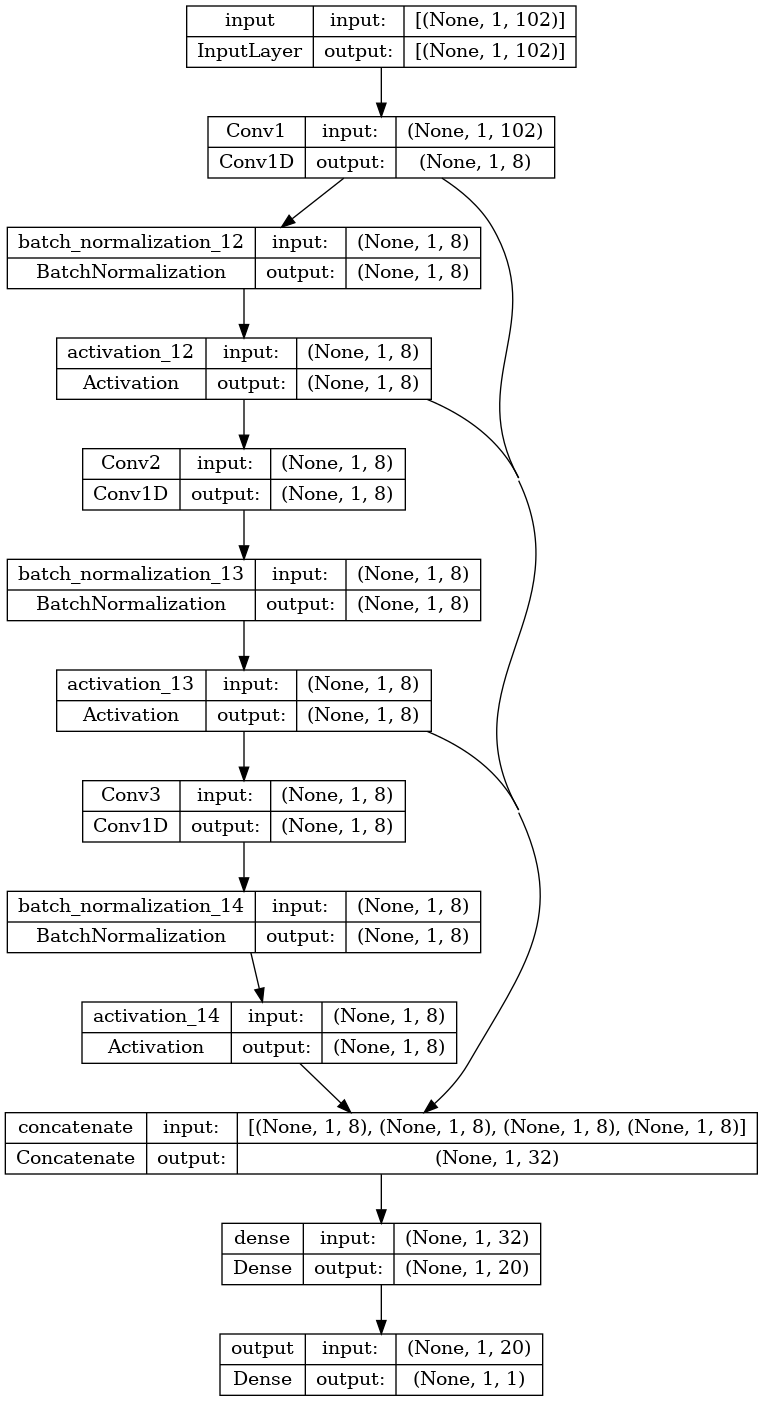

In [5]:
from keras.utils import plot_model

plot_model(shortcut5, to_file='assets/shortcut5.png', show_shapes=True, show_layer_names=True)